In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df =pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# There are no null values

In [6]:
df.rename(columns ={'Genre':'Gender'},inplace = True)

# EDA(Exploratory data analysis)

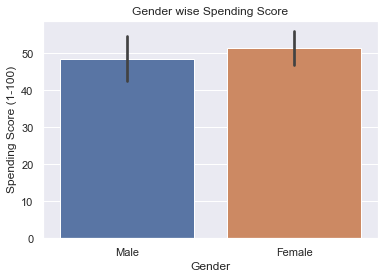

In [7]:
sns.barplot(x =df['Gender'],y =df['Spending Score (1-100)'])
plt.title('Gender wise Spending Score')
plt.show()

## Grouping Age into Adult, Senior, Super_Senior

In [8]:
def bins(x):
    if x>=18 and x<=30:
        return 'adult'
    elif x>30 and x<=50:
        return 'senior'
    else:
        return 'super_senior'

In [9]:
df['Age_category'] = df['Age'].apply(bins)

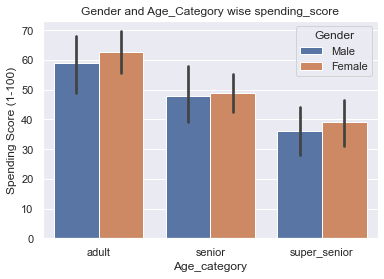

In [10]:
sns.barplot(x =df['Age_category'],y =df['Spending Score (1-100)'], hue =df['Gender'])
plt.title('Gender and Age_Category wise spending_score')
plt.show()

In [11]:
X = df.iloc[:,3:5].values

In [12]:
from sklearn.cluster import KMeans

# Finding numbers of clusters by 'Elbow Method'

In [13]:
wcss =[]

for i in range(1,11):
    km =KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

C:\Users\Asus\anaconda3\python\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


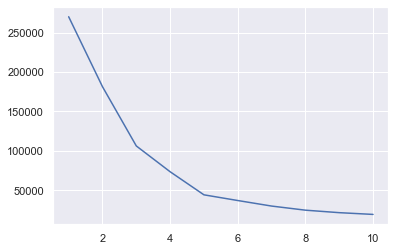

In [14]:
plt.plot(range(1,11),wcss)
plt.show()

# Number of clusters = 5, Because after that point the decrease in distance becomes very small

In [15]:
km = KMeans(n_clusters=5,random_state=42)
y_means = km.fit_predict(X)
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [16]:
# Let's check how many custumers belong to cluster 1

In [17]:
X[y_means==1].shape

(35, 2)

C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


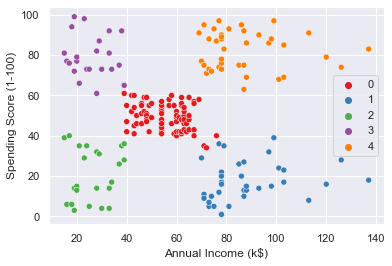

In [18]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=y_means,palette='Set1')
plt.show()

# Conclusion
## 1.Customers belongs to cluster 4, earning more and spending more
## 2.Customers belongs to cluster 3, earning less and spending more 
## 3.Customers belongs to cluster 2, earning Less and spending Less
## 4.Customers belongs to cluster 1, earning more and spending Less
## 5.Customers belongs to cluster 0, They lies in mid range.